Latent Dirichlet Allocation (LDA) is a technique for taking a collection of documents (usually a few paragraphs each) and describing them as a mixture of different "topics". It's an unsupervised learning technique. It bears some resemblance to clustering algorithms, and also to dimensionality reduction algorithms. One big collection of documents is the 20 newsgroups dataset from Usenet.

In [1]:
import sklearn.datasets
%time newsgroups_train = sklearn.datasets.fetch_20newsgroups(subset='train')
print(newsgroups_train.target_names)

CPU times: user 7 s, sys: 2.71 s, total: 9.71 s
Wall time: 19.6 s
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [2]:
len(newsgroups_train.data)

11314

In [3]:
print(newsgroups_train.data[0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [4]:
print(newsgroups_train.target_names[newsgroups_train.target[0]])

rec.autos


sklearn has a tool for converting each document into a binary vector. These vectors are really long descriptions of how many times different words show up in the document. So a document that says "Hi hi world!" might become a vector like `[1 1 2]` where each entry is associated with a word like `[the hi world bye]`.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=30, stop_words='english')
%time vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

CPU times: user 3.44 s, sys: 33 ms, total: 3.47 s
Wall time: 3.48 s


(11314, 6355)

In [6]:
vectors[0]

<1x6355 sparse matrix of type '<class 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>

In [7]:
print(vectors[0])

  (0, 3876)	1
  (0, 989)	1
  (0, 2911)	1
  (0, 5709)	1
  (0, 3502)	1
  (0, 3451)	1
  (0, 2987)	1
  (0, 2789)	1
  (0, 4489)	1
  (0, 6327)	1
  (0, 5358)	1
  (0, 2095)	1
  (0, 3731)	1
  (0, 3247)	1
  (0, 917)	1
  (0, 4835)	1
  (0, 5115)	1
  (0, 409)	1
  (0, 5275)	1
  (0, 4669)	1
  (0, 1932)	1
  (0, 1050)	1
  (0, 1994)	1
  (0, 3289)	1
  (0, 3450)	1
  (0, 5383)	1
  (0, 1931)	1
  (0, 1676)	1
  (0, 5013)	1
  (0, 6263)	1
  (0, 64)	1
  (0, 4148)	1
  (0, 1309)	1
  (0, 3564)	1
  (0, 5970)	1
  (0, 2836)	1
  (0, 4374)	1
  (0, 3920)	1
  (0, 1087)	5
  (0, 5721)	1
  (0, 2025)	2
  (0, 5943)	2
  (0, 6151)	2


We can check how many words are in the average document (the least common words are discarded).

In [8]:
vectors.nnz / float(vectors.shape[0])

79.56761534382181

It would take a while to run LDA on all 11k documents, so we're just going to do 5k.

In [0]:
n = 5000
vectors = vectors[:n]

In [10]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='batch')
%time fit = lda.fit_transform(vectors)

/usr/local/lib/python3.6/dist-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


CPU times: user 35.9 s, sys: 15.1 s, total: 51 s
Wall time: 29.5 s


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







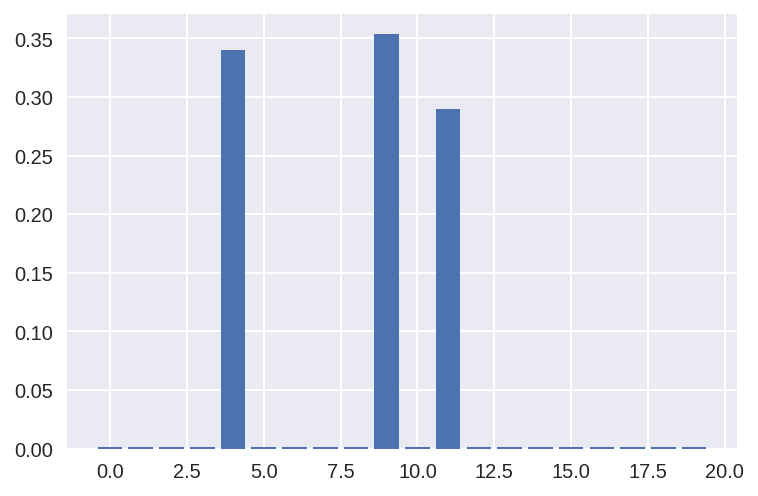

From: dabl2@nlm.nih.gov (Don A.B. Lindbergh)
Subject: Diamond SS24X, Win 3.1, Mouse cursor
Organization: National Library of Medicine
Lines: 10


Anybody seen mouse cursor distortion running the Diamond 1024x768x256 driver?
Sorry, don't know the version of the driver (no indication in the menus) but it's a recently
delivered Gateway system.  Am going to try the latest drivers from Diamond BBS but wondered
if anyone else had seen this.

post or email

--Don Lindbergh
dabl2@lhc.nlm.nih.gov



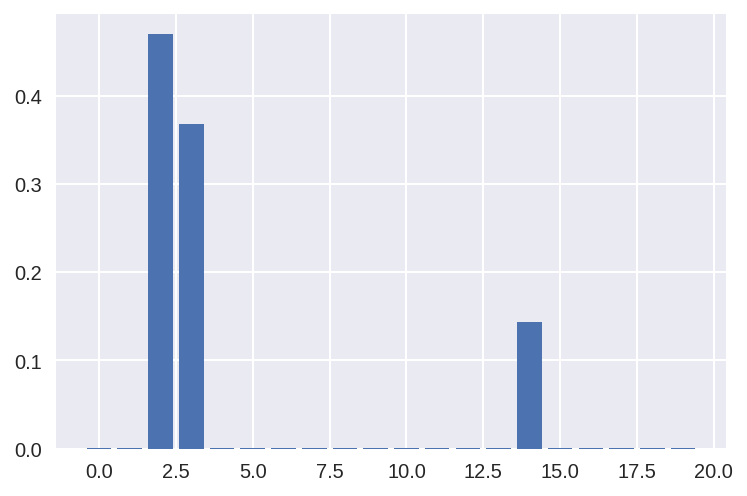

From: cdw2t@dayhoff.med.Virginia.EDU (Dances With Federal Rangers)
Subject: Re: Misc./buying info. needed
Organization: University of Virginia
Lines: 28

In article <1993Apr18.160449.1@hamp.hampshire.edu> jyaruss@hamp.hampshire.edu writes:

>Is there a buying guide for new/used motorcycles (that lists reliability, how
>to go about the buying process, what to look for, etc...)?

_Cycle World_ puts one out, but I'm sure it's not very objective.  Try talking
with dealers and the people that hang out there, as well as us.  We love to
give advice.

>Is there a pricing guide for new/used motorcycles (Blue Book)?

Most of the bigger banks have a blue book which includes motos -- ask for the
one with RVs in it.

>Are there any books/articles on riding cross country, motorcycle camping, etc?

Couldn't help you here.

>Is there an idiots' guide to motorcycles?

You're reading it.

----------------------------------------------------------------------------
|        Cliff Weston           DoD# 05

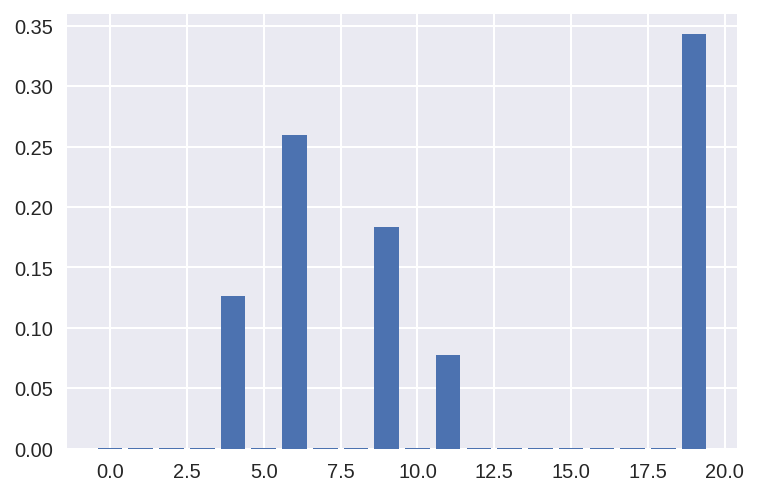

In [11]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
x = range(len(fit[0]))
print(newsgroups_train.data[0])
plt.bar(x, fit[0])
plt.show()
print(newsgroups_train.data[1000])
plt.bar(x, fit[1000])
plt.show()
print(newsgroups_train.data[2000])
plt.bar(x, fit[2000])
plt.show()

In [13]:
!pip install --quiet MulticoreTSNE
from MulticoreTSNE import MulticoreTSNE as TSNE
tsne = TSNE(n_components=2)
%time X_tsne = tsne.fit_transform(fit)

    100% |████████████████████████████████| 61kB 3.6MB/s 
    100% |████████████████████████████████| 430kB 8.0MB/s 
    100% |████████████████████████████████| 163kB 7.4MB/s 
  Running setup.py bdist_wheel for pycparser ... - \ | done
  Stored in directory: /root/.cache/pip/wheels/f2/9a/90/de94f8556265ddc9d9c8b271b0f63e57b26fb1d67a45564511
Successfully built pycparser
CPU times: user 21.6 s, sys: 20.3 ms, total: 21.7 s
Wall time: 21.7 s


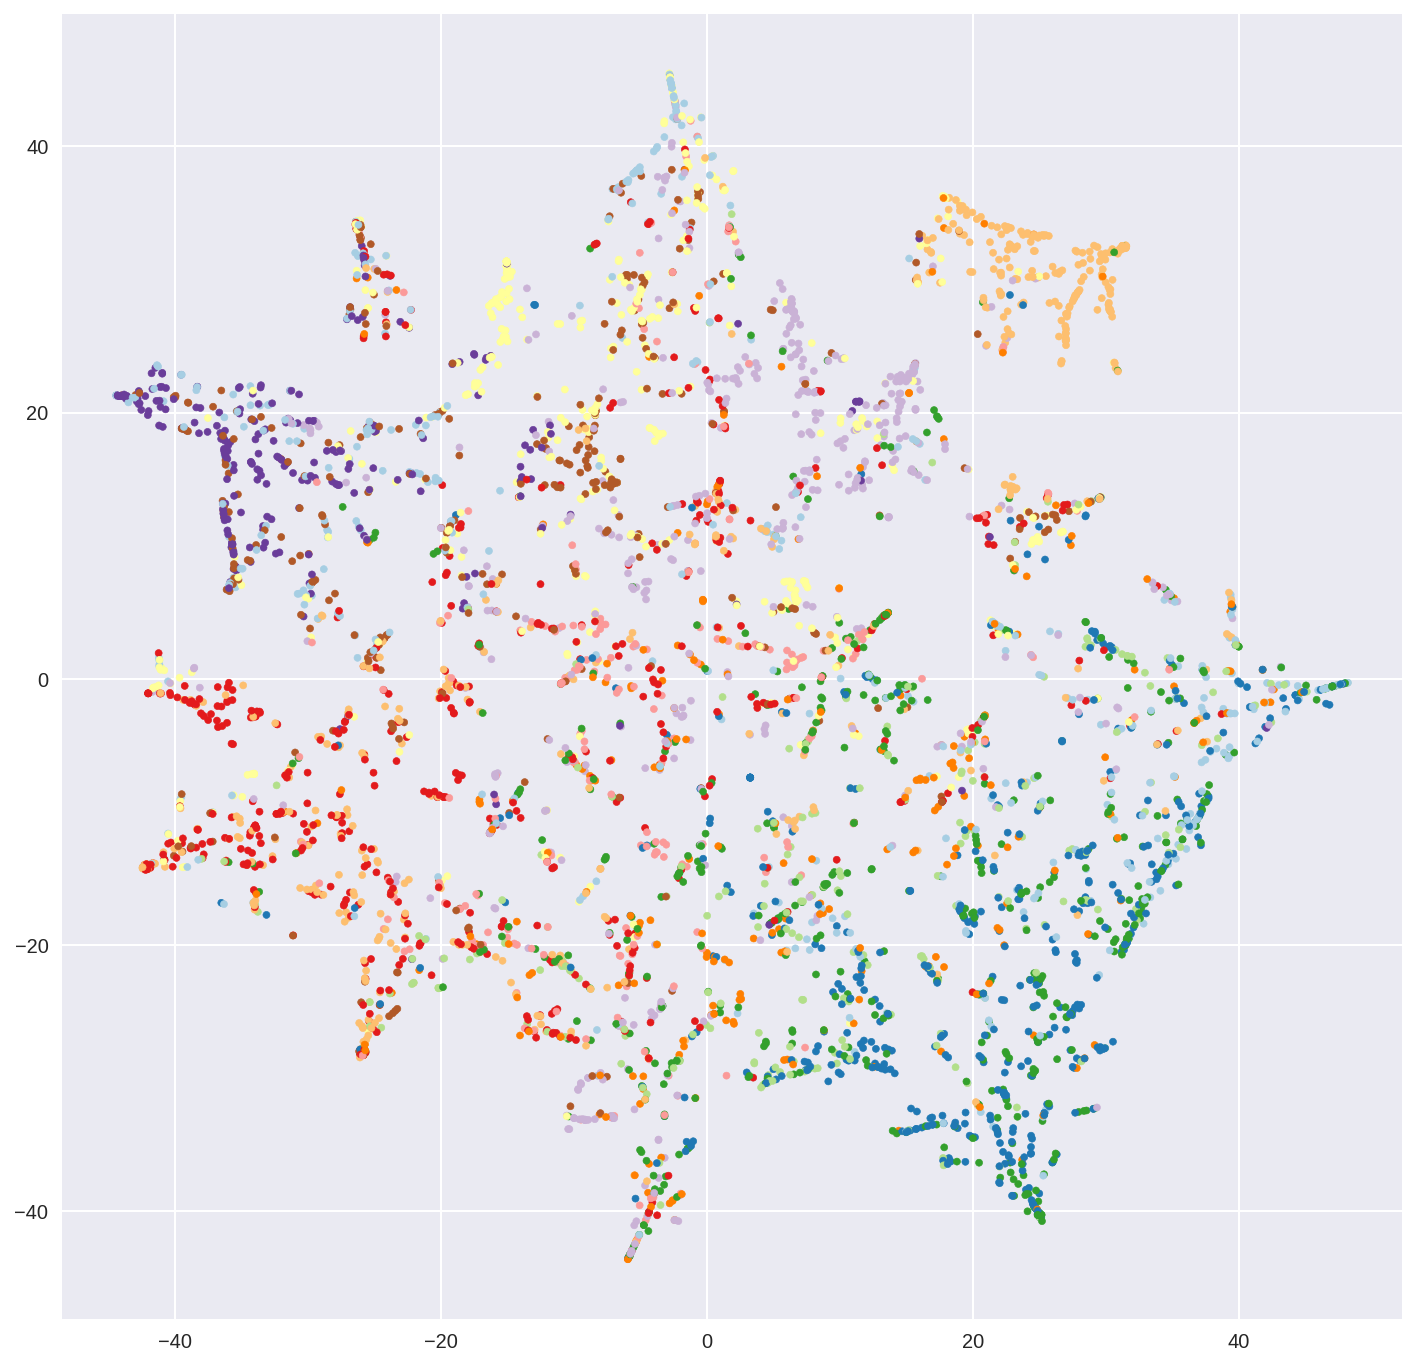

In [18]:
from matplotlib import cm
plt.figure(figsize=(12,12))
plt.scatter(X_tsne[:,0], X_tsne[:,1], marker='.', cmap=cm.Paired, c=newsgroups_train.target[:n])
plt.axis('equal')
plt.show()

In [15]:
!pip install --quiet umap-learn
import umap
%time X_umap = umap.UMAP().fit_transform(fit)

/usr/local/lib/python3.6/dist-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


CPU times: user 24.9 s, sys: 531 ms, total: 25.4 s
Wall time: 24.9 s


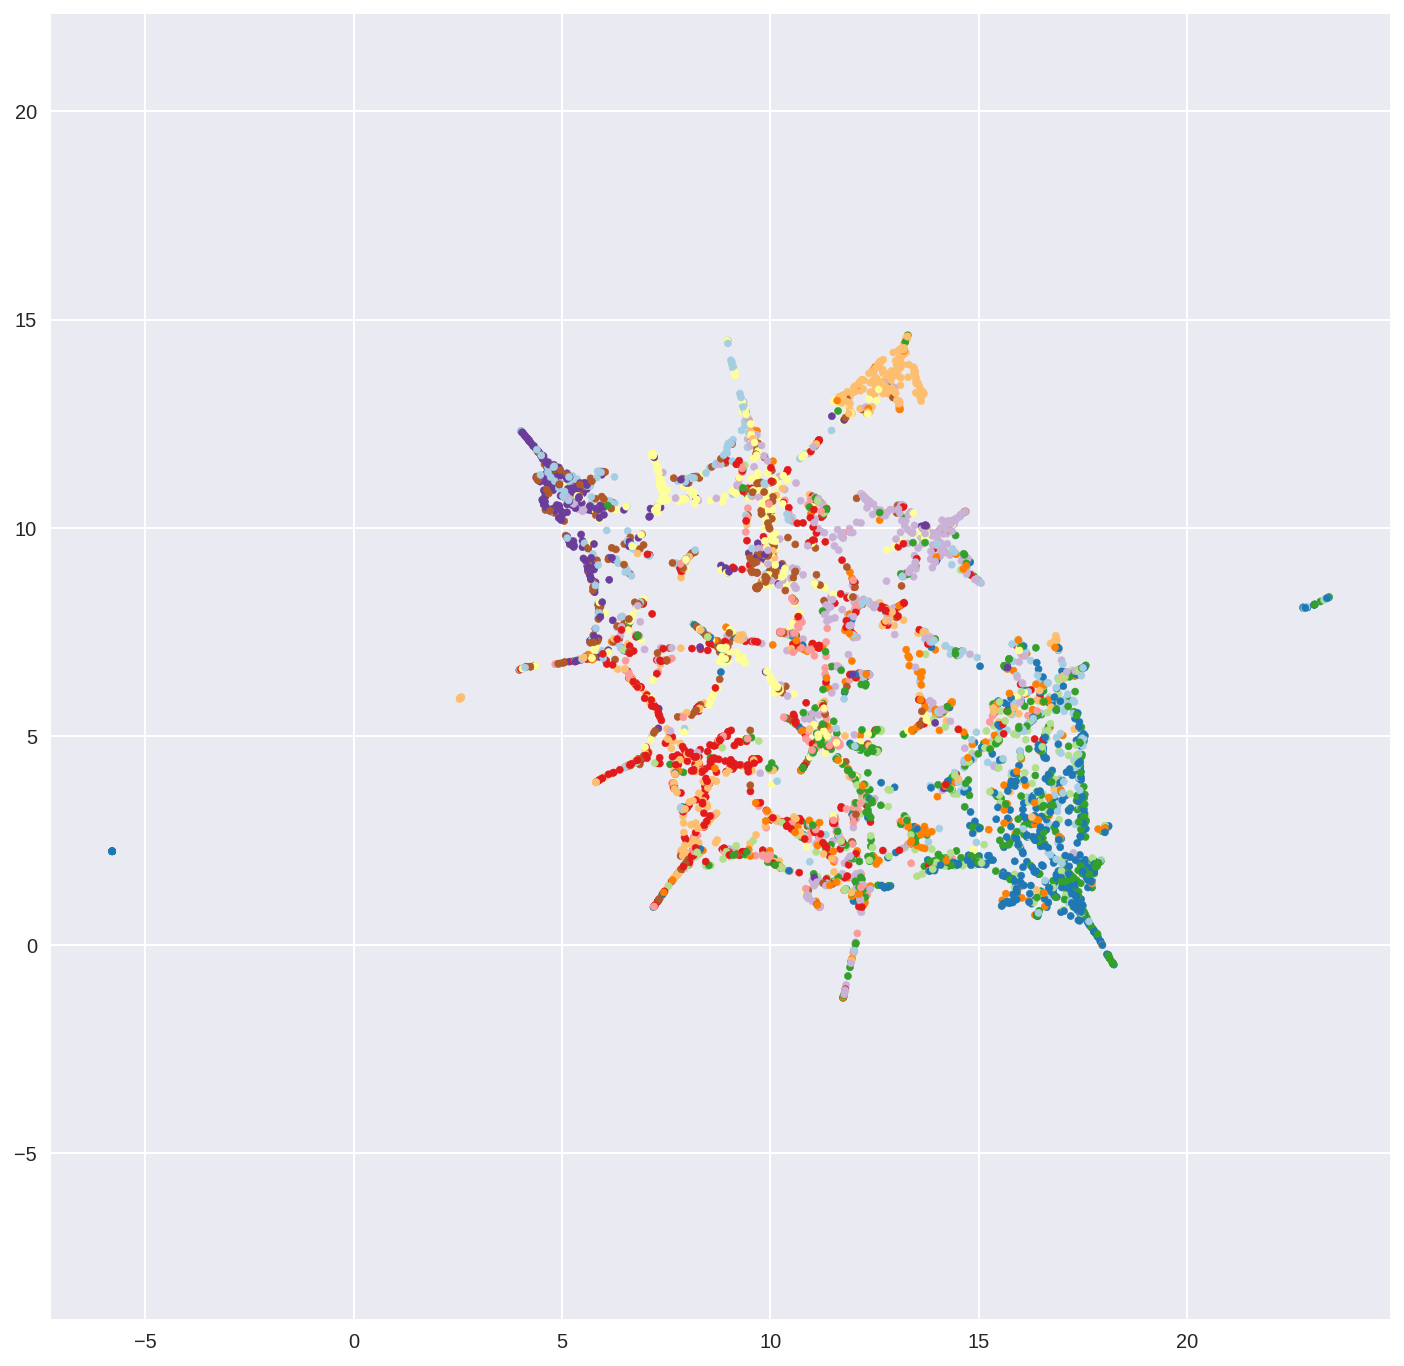

In [17]:
plt.figure(figsize=(12,12))
plt.scatter(X_umap[:,0], X_umap[:,1], marker='.', cmap=cm.Paired, c=newsgroups_train.target[:n])
plt.axis('equal')
plt.show()